In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import pylab
import scipy.stats as stats
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

from scipy.stats import norm
import statistics as stats2
from statistics import stdev

from scipy.stats import ttest_1samp,ttest_ind

In [4]:
import os
os.getcwd()
os.chdir('C:\\Users\\Neha Mishra\\Downloads')

In [5]:
df1 = pd.read_csv('Cold_Storage_Temp_Data_-1.csv')

In [6]:
df1.head()

,Season,Month,Date,Temperature
0,Winter,Jan,1,2.3
1,Winter,Jan,2,2.2
2,Winter,Jan,3,2.4
3,Winter,Jan,4,2.8
4,Winter,Jan,5,2.5


In [7]:
df1.isnull().sum()
#print('Null values:\n',df1.isnull().any())

Season         0
Month          0
Date           0
Temperature    0
dtype: int64

In [8]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,365.0,15.720548,8.808321,1.0,8.0,16.0,23.0,31.0
Temperature,365.0,3.002466,0.465832,1.7,2.7,3.0,3.3,4.5


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       365 non-null    object 
 1   Month        365 non-null    object 
 2   Date         365 non-null    int64  
 3   Temperature  365 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.5+ KB


In [10]:
print('Range of values Temperature: ', df1['Temperature'].max()-df1['Temperature'].min()) # as outliers present, its not a suitable measure
print('Minimum Temperature: ', df1['Temperature'].min())
print('Maximum Temperature: ',df1['Temperature'].max())
print('Mean value Temperature: ', df1['Temperature'].mean())
print('Median value Temperature: ',df1['Temperature'].median())
print('Mode value Temperature: ',df1['Temperature'].mode())
print('Standard deviation Temperature: ', df1['Temperature'].std())

Range of values Temperature:  2.8
Minimum Temperature:  1.7
Maximum Temperature:  4.5
Mean value Temperature:  3.0024657534246546
Median value Temperature:  3.0
Mode value Temperature:  0    3.1
dtype: float64
Standard deviation Temperature:  0.4658319416510761


In [11]:
Q1=df1['Temperature'].quantile(q=0.25)
Q3=df1['Temperature'].quantile(q=0.75)
print('Temperature - 1st Quartile (Q1) is: ', Q1)
print('Temperature - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of Temperature is ', stats.iqr(df1['Temperature']))

Temperature - 1st Quartile (Q1) is:  2.7
Temperature - 3st Quartile (Q3) is:  3.3
Interquartile range (IQR) of Temperature is  0.5999999999999996


<AxesSubplot:xlabel='Temperature', ylabel='Count'>

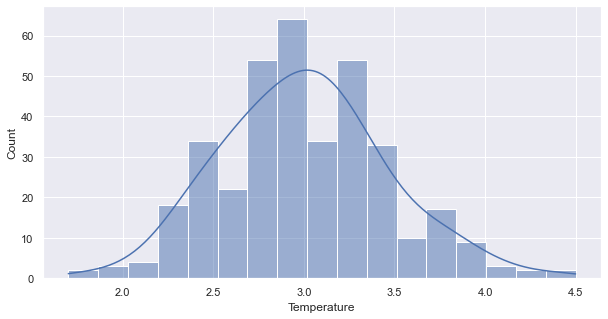

In [12]:
fig= plt.subplots(figsize=(10,5))
sns.histplot(df1['Temperature'], kde=True)

C:\Users\Neha Mishra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

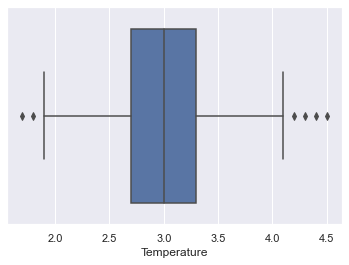

In [13]:
sns.boxplot(df1['Temperature'])

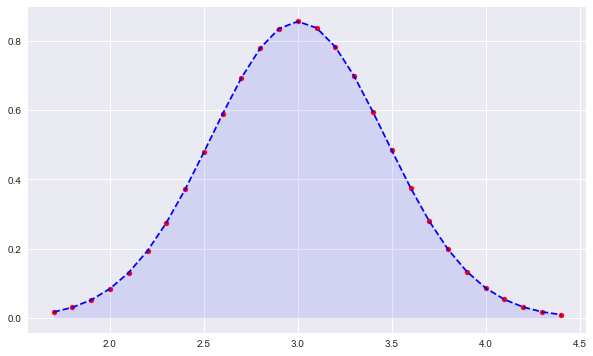

In [14]:
def pdf(x):
    mean = df1['Temperature'].mean()
    std = stdev(df1['Temperature'])
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out
  
# To generate an array of x-values
x = np.arange(1.7, 4.5, 0.1)
  
# To generate an array of 
# y-values using corresponding x-values
y = pdf(x)
  
# To fill in values under the bell-curve
x_fill = np.arange(1.7, 4.5, 0.1)
y_fill = pdf(x_fill)
  
# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (10, 6))
plt.plot(x,y, color = 'blue',linestyle = 'dashed')
  
plt.scatter(x, y, marker = 'o',s = 25, color = 'red')
  
plt.fill_between(x_fill, y_fill, 0,alpha = 0.1, color = 'blue')
plt.show()

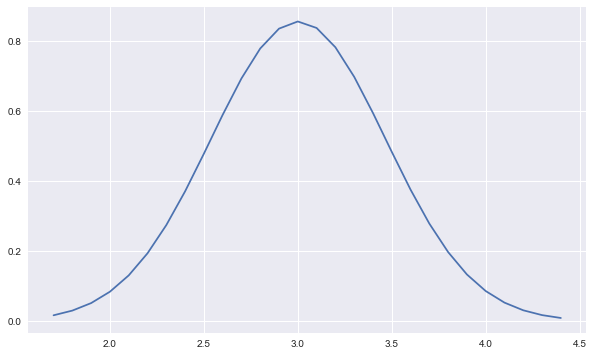

In [15]:
# Plot between min(Temp) and max(Temp) with 0.1 steps.
x_axis = np.arange(1.7, 4.5, 0.1)
  
# Calculating mean and standard deviation
mean = df1['Temperature'].mean()
sd = stdev(df1['Temperature'])

plt.figure(figsize=(10,6))
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Temperature'>

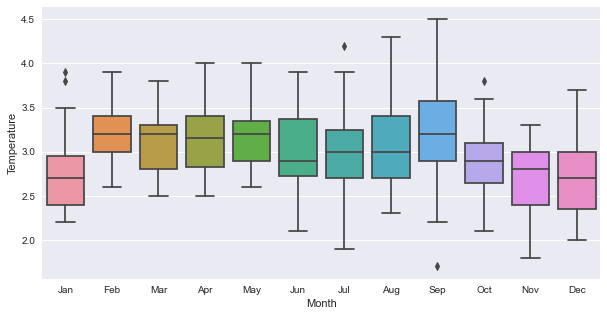

In [16]:
fig= plt.subplots(figsize=(10,5))
sns.boxplot(x='Month', y = 'Temperature', data=df1)

<AxesSubplot:xlabel='Season', ylabel='Temperature'>

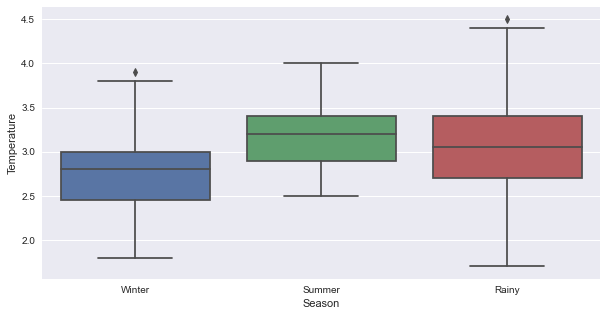

In [17]:
fig= plt.subplots(figsize=(10,5))
sns.boxplot(x='Season', y = 'Temperature', data=df1)

<AxesSubplot:xlabel='Month', ylabel='Temperature'>

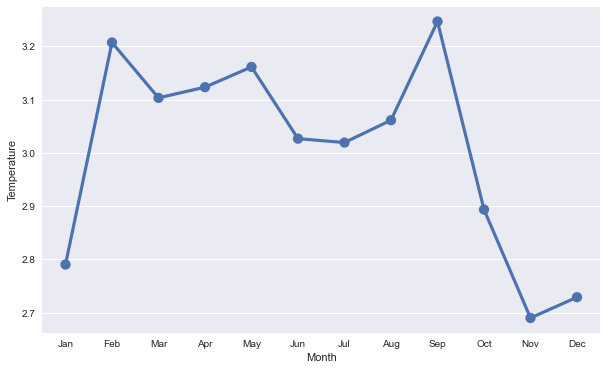

In [18]:
fig= plt.subplots(figsize=(10,6))
sns.pointplot(x='Month', y='Temperature', data=df1, ci=None)

<AxesSubplot:xlabel='Season', ylabel='count'>

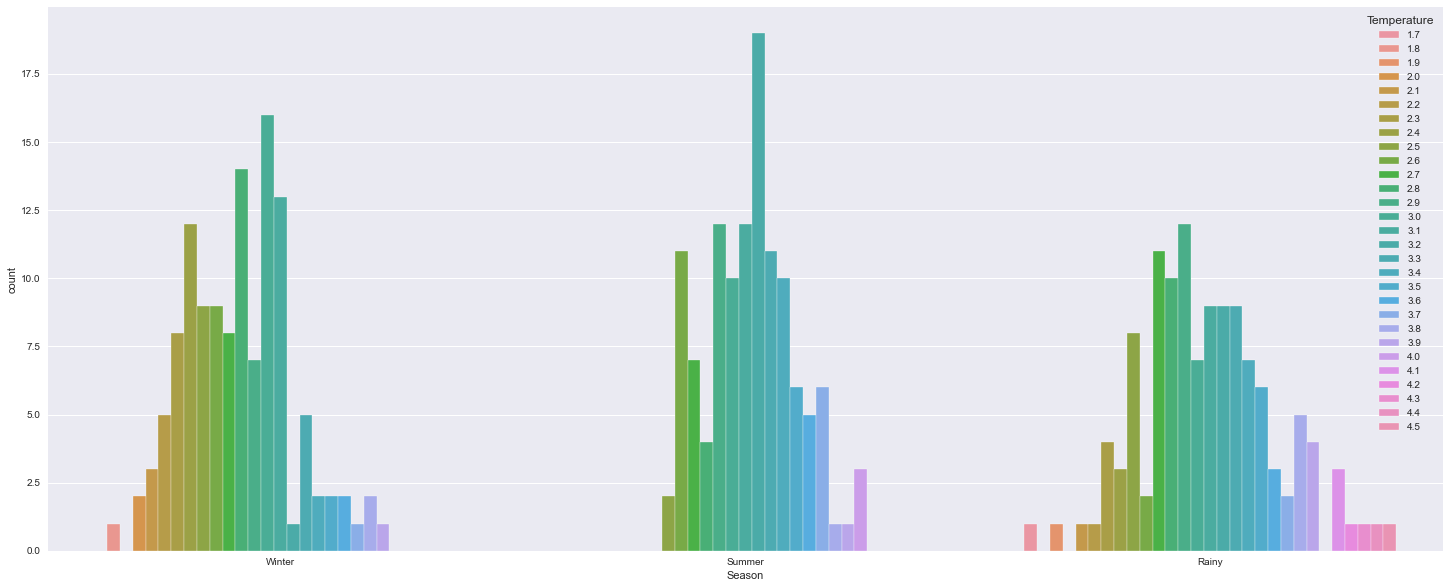

In [19]:
plt.figure(figsize=(25,10))
sns.countplot(x='Season', hue='Temperature', data=df1)

Text(0.5, 1.0, 'Temperature')

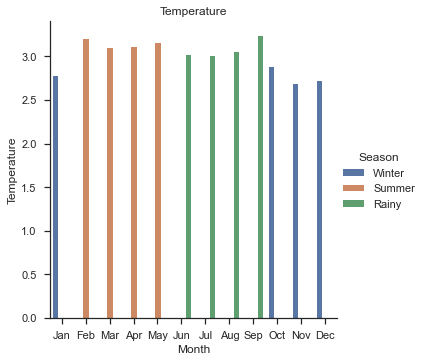

In [20]:
sns.set(style='ticks', color_codes=True)
sns.catplot(x='Month', y='Temperature', hue ='Season', kind='bar', ci=None, data=df1)
plt.title('Temperature')

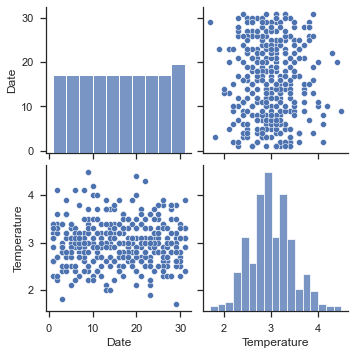

In [21]:
sns.pairplot(df1)

In [22]:
pd.crosstab(df1['Temperature'],df1['Season'])

Season,Rainy,Summer,Winter
Temperature,,,
1.7,1,0,0
1.8,0,0,1
1.9,1,0,0
2.0,0,0,2
2.1,1,0,3
2.2,1,0,5
2.3,4,0,8
2.4,3,0,12
2.5,8,2,9


In [23]:
pd.pivot_table(df1, index=['Season', 'Month'], columns=['Temperature'])

Date                                                     \
Temperature    1.7  1.8   1.9   2.0   2.1   2.2        2.3        2.4   
Season Month                                                            
Rainy  Aug     NaN  NaN   NaN   NaN   NaN   NaN  19.000000  12.000000   
       Jul     NaN  NaN  23.0   NaN   NaN   NaN  26.000000        NaN   
       Jun     NaN  NaN   NaN   NaN  23.0   NaN  17.000000        NaN   
       Sep    29.0  NaN   NaN   NaN   NaN  15.0        NaN  11.000000   
Summer Apr     NaN  NaN   NaN   NaN   NaN   NaN        NaN        NaN   
       Feb     NaN  NaN   NaN   NaN   NaN   NaN        NaN        NaN   
       Mar     NaN  NaN   NaN   NaN   NaN   NaN        NaN        NaN   
       May     NaN  NaN   NaN   NaN   NaN   NaN        NaN        NaN   
Winter Dec     NaN  NaN   NaN  13.5   5.0   9.5  23.333333  11.000000   
       Jan     NaN  NaN   NaN   NaN   NaN   2.0   1.000000  14.857143   
       Nov     NaN  3.0   NaN   NaN  13.0  14.5  16.666667  18.500000   
       Oct     NaN  NaN   NaN   NaN  20.0   NaN   7.000000  10.000000   

                                    ...                                     \
Temperature         2.5        2.6  ...   3.6        3.7   3.8   3.9   4.0   
Season Month                        ...                                      
Rainy  Aug    26.000000        NaN  ...   4.0  13.000000  15.0  31.0   NaN   
       Jul    14.500000        NaN  ...   NaN   9.000000  28.0  13.0   NaN   
       Jun    16.000000  15.000000  ...  25.0        NaN  17.5  19.0   NaN   
       Sep          NaN  30.000000  ...  23.0        NaN  25.0  26.0   NaN   
Summer Apr    30.000000  17.000000  ...  17.0  13.000000   NaN   NaN  10.5   
       Feb          NaN  18.000000  ...   NaN  16.666667   NaN   4.0   NaN   
       Mar    22.000000  20.000000  ...   4.0  11.000000  29.0   NaN   NaN   
       May          NaN  11.666667  ...  14.0  28.000000   NaN   NaN  20.0   
Winter Dec    18.000000  25.000000  ...   2.0  24.000000   NaN   NaN   NaN   
       Jan    15.666667  20.000000  ...   NaN        NaN  26.0  16.0   NaN   
       Nov    14.333333  22.000000  ...   NaN        NaN   NaN   NaN   NaN   
       Oct     9.000000  16.666667  ...  23.0        NaN  28.0   NaN   NaN   

                                               
Temperature        4.1   4.2   4.3   4.4  4.5  
Season Month                                   
Rainy  Aug         NaN   NaN  22.0   NaN  NaN  
       Jul         NaN  10.0   NaN   NaN  NaN  
       Jun         NaN   NaN   NaN   NaN  NaN  
       Sep    5.333333   NaN   NaN  20.0  9.0  
Summer Apr         NaN   NaN   NaN   NaN  NaN  
       Feb         NaN   NaN   NaN   NaN  NaN  
       Mar         NaN   NaN   NaN   NaN  NaN  
       May         NaN   NaN   NaN   NaN  NaN  
Winter Dec         NaN   NaN   NaN   NaN  NaN  
       Jan         NaN   NaN   NaN   NaN  NaN  
       Nov         NaN   NaN   NaN   NaN  NaN  
       Oct         NaN   NaN   NaN   NaN  NaN  

[12 rows x 29 columns]

array([[<AxesSubplot:title={'center':'Rainy'}>,
        <AxesSubplot:title={'center':'Summer'}>],
       [<AxesSubplot:title={'center':'Winter'}>, <AxesSubplot:>]],
      dtype=object)

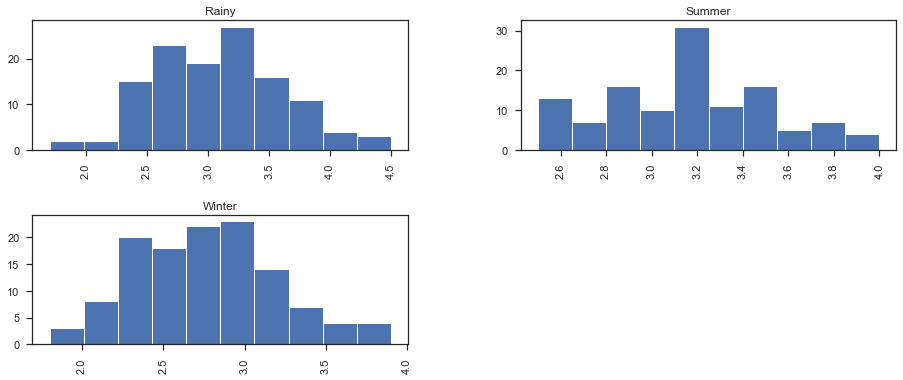

In [24]:
df1.hist(by='Season',column = 'Temperature',figsize=(15,6))

array([[<AxesSubplot:title={'center':'Apr'}>,
        <AxesSubplot:title={'center':'Aug'}>,
        <AxesSubplot:title={'center':'Dec'}>],
       [<AxesSubplot:title={'center':'Feb'}>,
        <AxesSubplot:title={'center':'Jan'}>,
        <AxesSubplot:title={'center':'Jul'}>],
       [<AxesSubplot:title={'center':'Jun'}>,
        <AxesSubplot:title={'center':'Mar'}>,
        <AxesSubplot:title={'center':'May'}>],
       [<AxesSubplot:title={'center':'Nov'}>,
        <AxesSubplot:title={'center':'Oct'}>,
        <AxesSubplot:title={'center':'Sep'}>]], dtype=object)

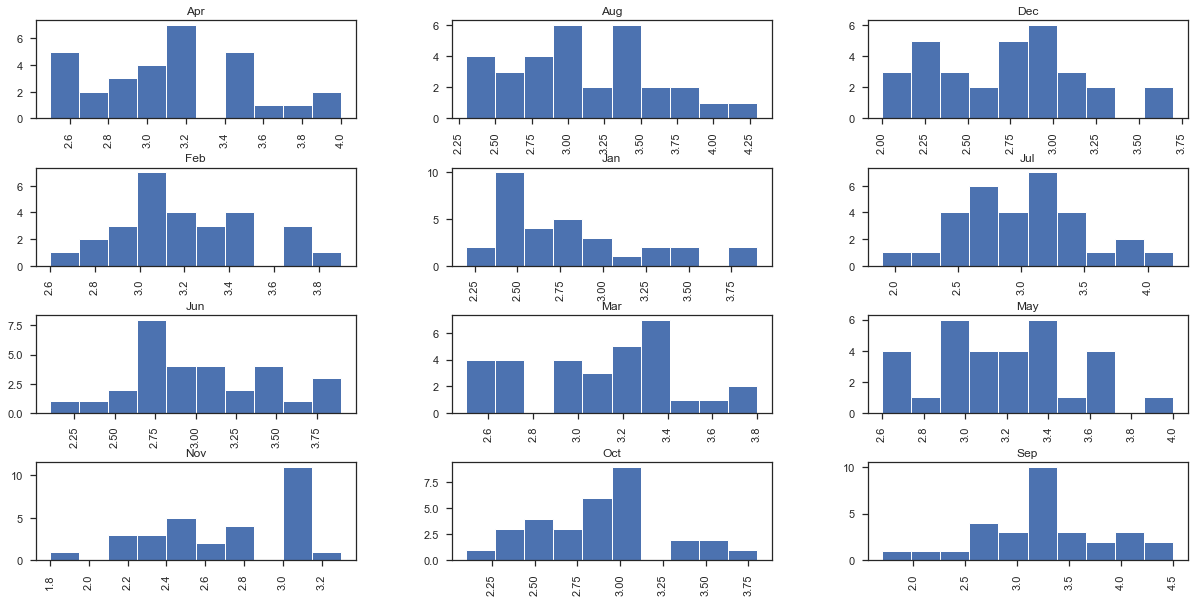

In [25]:
df1.hist(by='Month',column = 'Temperature',figsize=(20,10))

C:\Users\Neha Mishra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


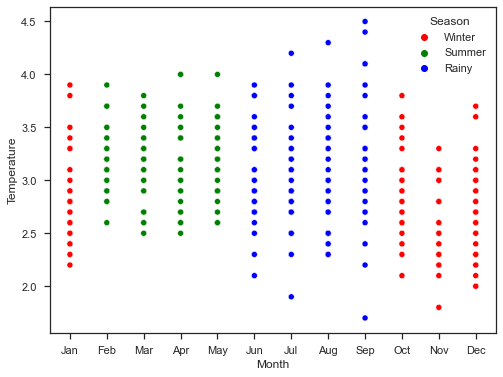

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(df1.Month, df1.Temperature ,hue=df1.Season,palette= ['red','green','blue'])
plt.show()

# 1.1 Find mean cold storage temperature for Summer, Winter, and Rainy Season. (7 marks)

In [27]:
region_df = df1.groupby('Season')['Temperature'].mean()
print(region_df,'\n')

Season
Rainy     3.087705
Summer    3.147500
Winter    2.776423
Name: Temperature, dtype: float64 



# 1.2 Find the overall mean for the full year.

In [28]:
print(f"Overall mean for full year: {df1['Temperature'].mean()}")

Overall mean for full year: 3.0024657534246546


In [29]:
df1['Temperature'].sum()/df1['Temperature'].count()

3.0024657534246577

In [30]:
print(((3.087705+3.147500+2.776423)/3))

3.003876


# 1.3 Find Standard Deviation for the full year.

In [31]:
print(f"Standard Deviation for the full year: {stdev(df1['Temperature'])}")

Standard Deviation for the full year: 0.4658319416510761


# 1.4 Assume Normal distribution, what is the probability of temperature having fallen below 2º C?

z-score =(x-mean)/std dev

In [32]:
z=(2-df1['Temperature'].mean())/0.5
z

-2.004931506849309

In [33]:
a = stats.norm.cdf(z)
print(f"Probability of temperature having fallen below 2º C: {a*100} %")

Probability of temperature having fallen below 2º C: 2.248518493937247 %


In [34]:
1.5 Assume Normal distribution, what is the probability of temperature having gone above 4º C?

Object `C` not found.


# 1.5 Assume Normal distribution, what is the probability of temperature having gone above 4º C

In [35]:
y=(4-df1['Temperature'].mean())/0.5
y

1.9950684931506908

In [36]:
b = 1 - stats.norm.cdf(y)
print(f"Probability of temperature having gone above 4º C: {b*100} %")

Probability of temperature having gone above 4º C: 2.301770505698253 %


# 1.6 What will be the penalty for the AMC Company?

.As particular Temperature can never attain a value “lower than 2” and “higher than 4” at the same time, therefore these 2 are mutually exclusive events, thus P (A U B) = P(A) + P(B).

.So, P = P(Temp<2) + P(Temp>4)

.Therefore, penalty = 10% of AMC, since the probability of Temps going outside of the range of 2 – 4 C falls between the 2.5% and 5% boundary as mentioned in the problem statement.

In [38]:
c = ((1 - stats.norm.cdf(y))*100) + (stats.norm.cdf(z)*100)
print(f"probability of Temps going outside of the range of 2 – 4 C falls between the 2.5% and 5% boundary: {c} %")

probability of Temps going outside of the range of 2 – 4 C falls between the 2.5% and 5% boundary: 4.5502889996355 %


# Problem 2

# “Cold_Storage_Mar2018_.csv”

# 2.1 Which Hypothesis test shall be performed to check if corrective action is needed at the cold storage plant? Justify your answer.

Observations: 1) The dataset 1 contains the temperatures throughout the year of 2016

2) The dataset 2 contains the temperatures from a sample of 35 days in 2018 – 02/11 to 03/17 that was procured on back of customer complaints

3) From this, we can infer, the dataset 2 is not a sample of the dataset 1.

4) Therefore, we cannot get the population mean/standard deviation.

5) As the dataset 2 is independent, and we have not been provided with the population data for the same, cannot deduce the Population standard deviation.

Assumptions: 1)We are assuming the population mean and standard deviation to be same as Sample mean Mu and Sample Standard deviation Sigma, thus assuming our Sample estimation will be reflective of the reality/population sampling
Approach: 1) Since the population standard deviation is unknown, the best Statistic test to perform would be the T-statistic Test

2) Since we are talking about potential corrective actions, we intend to be more exhaustive and detail oriented.

In [40]:
df2 = pd.read_csv('Cold_Storage_Mar2018_.csv')
df2.head()

,Season,Month,Date,Temperature
0,Summer,Feb,11,4.0
1,Summer,Feb,12,3.9
2,Summer,Feb,13,3.9
3,Summer,Feb,14,4.0
4,Summer,Feb,15,3.8


In [41]:
df2.isnull().sum()

Season           0
Month            0
Date             0
 Temperature     0
dtype: int64

In [42]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Date,35.0,14.400000,7.389181,1.0,9.5,14.0,19.5,28.0
Temperature,35.0,3.974286,0.159674,3.8,3.9,3.9,4.1,4.6


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Season         35 non-null     object 
 1   Month          35 non-null     object 
 2   Date           35 non-null     int64  
 3    Temperature   35 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


In [44]:
df2.rename(columns = {" Temperature ": "Temperature"}, inplace = True)

# 2.2 State the Hypothesis and do the necessary calculations to accept or reject the corresponding null hypothesis.

• Null Hypothesis, 𝐻0 : Mean Temp<=3.9
    
• Alternate Hypothesis, 𝐻1 : Mean Temp >3.9
    
the p-value of this test to be less than the α value.(0.1)

Assumed Population mean = 3.9

In [45]:
print(f"Sample mean:{df2['Temperature'].mean()}")
print(f"Sample Standard Deviation :{stdev(df2['Temperature'])}")
print(f"Sample Size is {len(df2)}")
print(f"Degree of freedom: {len(df2)-1}")
print(f"Sampling Error: {df2['Temperature'].mean()-3.9}")
print(f"Standard Error: {stdev(df2['Temperature'])/math.pow(len(df2),0.5)}")
alpha =0.1

Sample mean:3.974285714285715
Sample Standard Deviation :0.15967403771223335
Sample Size is 35
Degree of freedom: 34
Sampling Error: 0.07428571428571518
Standard Error: 0.026989838468435126


In [46]:
t_statistic, p_value = ttest_1samp(df2['Temperature'], 3.9)
print('One sample t test \nt statistic: {0}\n  p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: 2.752358609800241
  p value: 0.0047111977021322155 


In [47]:
t_stat, p_val = ttest_1samp(df2['Temperature'], 3.9,alternative = 'greater')
print('One sample t test \nt statistic: {0}\n  p value: {1} '.format(t_stat, p_val))

One sample t test 
t statistic: 2.752358609800241
  p value: 0.0047111977021322155 


In [48]:
# p_value < 0.1 => alternative hypothesis:

print('Level of significance: %.2f' %alpha)
if p_value < alpha: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.10
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.009422395404264431


Level of significance: 0.10
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.009422395404264431
Since Pvalue < alpha, the Null Hypothesis is rejected, and Alternative Hypothesis is accepted, thus statistically concluding (via T Test) that the Temperature in the Cold Storage is greater than 3.9 C with 90% confidence [(1 – alpha)*100], thus causing the products go sour and often smelling.

I found the actual confidence by subtracting the Pvalue from 1.

Actual Confidence = (1 - Pvalue) * 100 = 99.52888%

# 2.3 Give your inference.

We have seen from the dataset 1 that holds the values from the year 2016, the average temperature throughout the year is 3.002 C. However, as months went by, the working quality of the Cold Storage seems to have degraded. And from the samples taken in 2018, without even putting it through any Statistical analyses, we can see a mean temperature to be 3.97 C, which is 0.97 degree higher, and going by the working principle of Cold storages, that does not look good, which is why the complaints of products going sour and smelling kept pouring in. However, we hold our judgement before doing an analysis through Statistical analysis and concluding the result. To do a root cause analysis via statistical hypothesis procedures, we performed T-statistic, which gave us the following results:

1. Having performed T tests, we have confirmed rejecting the Null Hypothesis of Mean Temp < 3.9 C.
1. With 90% confidence, we can conclude the temperature indeed crossed the permissible limit of 3.9 C.
1. With 99.53% actual confidence, we can conclude the above statement.
1. With only 0.47% confidence, we can conclude that the temperature is equal to or lesser than 3.9 C.
1. Thus, statistically we can conclude that there needs to be corrective measures taken to keep the Cold Storage function properly, and there is no apparent problem (statistically speaking) from procurement side from where Cold Storage is getting the Dairy Products.
1. We can submit the results to the owner of the Cold Storage and they need to figure out the resolution path, is it the lackadaisical approach in work by the Supervisor or some inherent problems with the machines being used. This, we cannot conclude statistically due to lack of necessary data.

Also, as we have seen earlier, there is ‘almost’ a 5% probability of the temperatures to be outside of the permissible range of 2-4 C, thus attracting a hefty fine of 10% AMC, and until immediate necessary measures are taken, it could cross the 5C mark and attract even a heftier fine of 25% AMC.

# END